# Trabalho 2 - Métodos Numérico para Termofluidos

---

UNIVERSIDADE DE BRASÍLIA

FACULDADE DE TECNOLOGIA

DEPARTAMENTO DE ENGENHARIA MECÂNICA

MÉTODOS NUMÉRICOS EM TERMOFLUIDOS

---

Aluno: Felipe Andrade - 17/0162010

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import math

### Métodos Numéricos Para solucão de EDO's

Seja uma EDO de primeira ordem geral:
$$
\bar{y'} =  f(t, \bar{y}), \\ y(0) = y_o
$$

#### Método de Euler Explicito
$$
y_{n+1} = y_n + \Delta t f_n
$$

#### Método de Euler Implícito
$$
y_{n+1} = y_n +\Delta t f_{n+1}
$$

#### Runge-Kutta de segunda ordem
$$
y_n+1 = y_n + \frac{1}{2} (k_1 + k_2)
$$
$$
k_1 = \Delta t f(t_n , y_n )
$$
$$
k_2 = \Delta t f(t_n + \Delta t, y_n + k_1)
$$

#### Runge-Kutta de quarta ordem
$$
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2 k_3 + k_4),\\
$$
$$
k_1 = \Delta t f(t_n, y_n),\\
$$
$$
k_2 = \Delta t f ( t_n + \frac{\Delta t}{2}, y_n + \frac{k_1}{2}),\\
$$
$$
k_3 = \Delta t f ( t_n + \frac{\Delta t}{2}, y_n + \frac{k_2}{2}),\\
$$
$$
k_4 = \Delta t f ( t_n + \Delta t, y_n + k_3)
$$

Para fins de simplifical plots multiplos e apresentacão de resultados, foi criada uma classe de resultados.

In [ ]:
"""_summary_
A classe Resultado gera um objeto com os resultados necessários para a geracão do gráfico
"""

class Resultado:
    def __init__(self, t, y_o, y, y_bar, methods, dt=.1):
        self.initial = [t, y_o, y, y_bar, dt]
        self.t = t
        self.y_o = y_o
        self.y = y
        self.y_bar = y_bar
        self.dt = dt
        self.methods_used = methods
        self.explicit_euler = []
        self.implicity_euler = []
        self.runge_kutta_2 = []
        self.runge_kutta_4 = []
        self.analitical = []
        self.result = []
        self.errors = []
        
    def set_explicit_euler(self, y):
        self.explicit_euler = y
        self.result.append(y)
        self.reset_inital()
    
    def set_implicity_euler(self, y):
        self.implicity_euler = y
        self.result.append(y)
        self.reset_inital()

    def set_runge_kutta_2(self, y):
        self.runge_kutta_2 = y
        self.result.append(y)
        self.reset_inital()
        
    def set_runge_kutta_4(self, y):
        self.runge_kutta_4 = y
        self.result.append(y)
        self.reset_inital()
        
    def set_analitical(self,y_bar):
        y_values = []
        for value in y_bar:
            y_values.append(value)
        
        self.analitical = y_values
        self.result.append(self.analitical)
        self.reset_inital()
        
    def apppend_error(self, erro):
        self.errors.append(erro)
        
    def reset_inital(self):
        self.t = self.initial[0]
        self.y_o = self.initial[1]
        self.y = self.initial[2]
        self.y[0] = self.y_o
        self.y_bar = self.initial[3]
        self.dt = self.initial[4]
        
    def print_results(self):
        for i in range(len(self.methods_used)):
            print(f'----------\n{self.methods_used[i]}\n-----------\n{self.result[i]}')

## Exercício 1

No exercício é pedido para que se solucione a equacão:
$$
y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4
$$
Para o método de Euler Implícito foi utilizada a expressão:
$$
y_{n + 1} = y_n + (\Delta t \cdot y\prime_{n + 1})
$$
Como podemos observar a partir do gráfico plotado abaixo, todas as solucões numéricas e a solucão analítica são aproximadamente iguais.


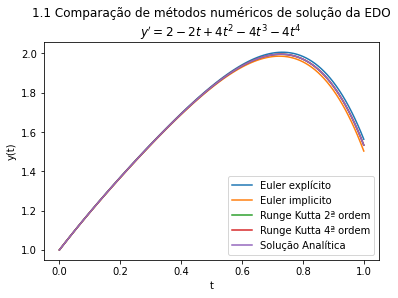

In [21]:
methods_used = ['Euler explícito', 'Euler implicito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt =0.01

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t: 2 - (2 * t) + (4 * (t ** 2)) - (4 * (t ** 3)) - (4 * (t ** 4))
'''Definindo função exata'''
y_bar = lambda t : 1 + (2 * t) - (t ** 2) + ((4 / 3) * (t ** 3)) - (t ** 4) - ((4 / 5) * (t ** 5))
'''criando objeto para os resultados'''
ex_1 = Resultado(t, y_o, y, y_bar, methods_used, dt)
def reset():
    y = np.zeros(len(t))
    y[0] = y_o

'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

'''Euler Explítito'''
for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_1.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_1.apppend_error(erro)
erro = np.zeros(len(t))

'''Euler Implícito'''
for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n + 1]))
        
ex_1.set_implicity_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_1.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n])
    k2 = dt * y_prime(t[n + 1])
    y[n + 1] = y[n] + 0.5 * (k1 + k2)

ex_1.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_1.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n])
    k2 = dt * y_prime(t[n] + (0.5 * dt))
    k3 = dt * y_prime(t[n] + (0.5 * dt))
    k4 = dt * y_prime(t[n + 1])
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)

ex_1.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_1.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_1.set_analitical(y_values)
ex_1.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('1.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_1.explicit_euler)
plt.plot(t, ex_1.implicity_euler)
plt.plot(t, ex_1.runge_kutta_2)
plt.plot(t, ex_1.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)

## Exercício 2

No exercício é pedido para que se solucione a EDO:
$$
y^\prime = 1 + \frac{y}{t}
$$
A equacão utilizada para calcular Euler implícito foi:
$$
y_{n+1} = \frac{y_{n}  + \Delta t}{\bigg(1 - \frac{\Delta t}{t_{n + 1}}\bigg)}
$$

Como podemos observar nos gráficos plotados, temos que as solucões numéricas são aproximadamente iguais à solucão analítica. O maior erro que obtemos é de 0.005, que é um erro considerável em certos casos mais ainda abixo o suficiente para ter aplicacões práticas.

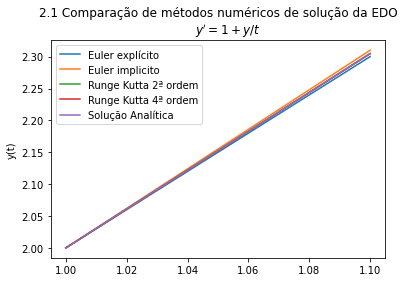

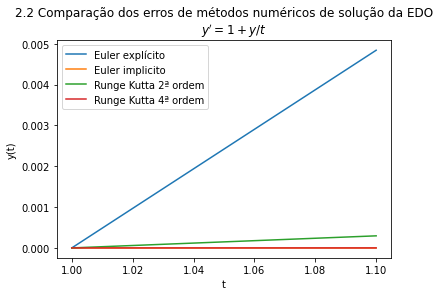

In [22]:
methods_used = ['Euler explícito', 'Euler implicito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 1.
t_final = 1.
y_o = 2.
dt = 0.1

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t, y : 1 + (y /  t)
'''Definindo função exata'''
y_bar = lambda t : (t * math.log(t)) + (2 * t)
'''criando objeto para os resultados'''
ex_2 = Resultado(t, y_o, y, y_bar, methods_used,dt)

def reset():
    y = np.zeros(len(t))
    y[0] = y_o


'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

'''Euler Explícito'''
for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n], y[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_2.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_2.apppend_error(erro)
erro = np.zeros(len(t))

'''Euler Implícito'''
for n in range(len(t) - 1):
    y[n + 1] = (y[n] + dt) / (1 - (dt / t[n + 1]))
        
ex_2.set_implicity_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_2.apppend_error(erro)
erro = np.zeros(len(t))

'''Runge Kutta 2'''
for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime(t[n + 1], (y[n] + k1))
    y[n + 1] = y[n] + 0.5 * (k1 + k2)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_2.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_2.apppend_error(erro)
erro = np.zeros(len(t))

'''Runge Kutta 4'''
for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k1)))
    k3 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k2)))
    k4 = dt * y_prime(t[n + 1], (y[n] + k3))
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_2.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_2.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_2.set_analitical(y_values)
ex_2.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('2.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = 1 + y/t $')
plt.ylabel('y(t)')
plt.plot(t, ex_2.explicit_euler)
plt.plot(t, ex_2.implicity_euler)
plt.plot(t, ex_2.runge_kutta_2)
plt.plot(t, ex_2.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)
'''
Erro
'''
plt.figure()
plt.title('2.2 Comparação dos erros de métodos numéricos de solução da EDO\n \
    $ y^\prime = 1 + y/t $')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_2.errors[0])
plt.plot(t, ex_2.errors[1])
plt.plot(t, ex_2.errors[2])
plt.plot(t, ex_2.errors[3])

plt.legend(methods_used)



## Exercício 3

No exercício é pedido para que se solucione a EDO:
$$
y^\prime = t^2 y
$$

A equacão utilizada para calcular Euler Implícito foi:
$$
y_{n + 1} = y_n \frac{1}{(1 - \Delta t \cdot t_{n + 1}^2)}
$$

Podemos ver através dos gráficos plotados que os métodos de Runge Kutta apresentam erros despresíveis e praticamente convergem com a solucão analítica. Já os métodos eulerianos tiveram um resultado mais interessante, uma vez que aparentemente a solucão analítica para o problema está quase que perfeitamente localizada no meio das solucões numéricas eulerianas, isto é parece que os resultados obtidos analíticamente são uma média aritimética pontual dos resultados obtidos pelos métodos eulerianos explícito e implícito.

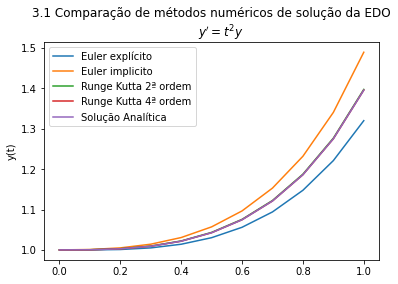

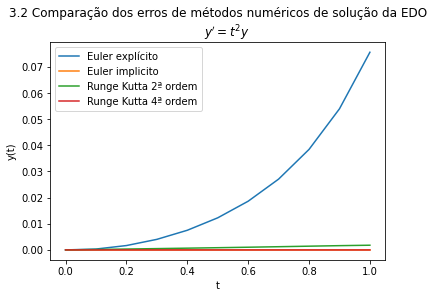

In [23]:
methods_used = ['Euler explícito', 'Euler implicito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']


'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt =0.1

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t, y : (t ** 2) * y
'''Definindo função exata'''
y_bar = lambda t : (math.exp((t ** 3) / 3))
'''criando objeto para os resultados'''
ex_3 = Resultado(t, y_o, y, y_bar, methods_used,dt)

'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n], y[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_3.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_3.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] / (1 - dt * (t[n + 1] ** 2))
        
ex_3.set_implicity_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_3.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime(t[n + 1], (y[n] + k1))
    y[n + 1] = y[n] + 0.5 * (k1 + k2)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_3.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_3.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k1)))
    k3 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k2)))
    k4 = dt * y_prime(t[n + 1], (y[n] + k3))
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_3.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_3.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_3.set_analitical(y_values)
ex_3.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('3.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = t^2 y $')
plt.ylabel('y(t)')
plt.plot(t, ex_3.explicit_euler)
plt.plot(t, ex_3.implicity_euler)
plt.plot(t, ex_3.runge_kutta_2)
plt.plot(t, ex_3.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)
'''
Erro
'''
plt.figure()
plt.title('3.2 Comparação dos erros de métodos numéricos de solução da EDO\n \
    $ y^\prime = t^2 y$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_3.errors[0])
plt.plot(t, ex_3.errors[1])
plt.plot(t, ex_3.errors[2])
plt.plot(t, ex_3.errors[3])

plt.legend(methods_used)



## Exercício 4
No exercício é pedido para que se solucione a EDO:
$$
y^\prime = t y^2
$$
Não foi pedido análises pelo método de Euler Implícito.

Novamente podemos ver os resultados eulerianos similares aos do execício 3, porém com erros uma ordem de grandeza maior $10 ^ -1$. Podemos ver através dos gráficos plotados que os métodos de Runge Kutta apresentam erros despresíveis e praticamente convergem com a solucão analítica.

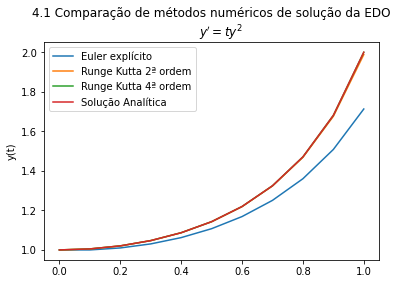

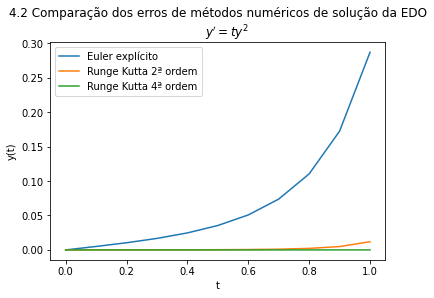

In [34]:
methods_used = ['Euler explícito',  'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt = 0.1

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t, y : t * (y ** 2)
'''Definindo função exata'''
y_bar = lambda t : - 2 / ((t ** 2) - 2)
'''criando objeto para os resultados'''
ex_4 = Resultado(t, y_o, y, y_bar, methods_used,dt)


'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n], y[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_4.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_4.apppend_error(erro)
erro = np.zeros(len(t))

# for n in range(len(t) - 1):
#     y[n + 1] = y[n] + (dt * y_prime(t[n + 1]))
        
# ex_5.set_implicity_euler(y)
# y = np.zeros(len(t))
# y[0] = y_o
# ex_5.apppend_error(erro)
# erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime(t[n + 1], (y[n] + k1))
    y[n + 1] = y[n] + 0.5 * (k1 + k2)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_4.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_4.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k1)))
    k3 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k2)))
    k4 = dt * y_prime(t[n + 1], (y[n] + k3))
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_4.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_4.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_4.set_analitical(y_values)
ex_4.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('4.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = t y^2 $')
plt.ylabel('y(t)')
plt.plot(t, ex_4.explicit_euler)
# plt.plot(t, ex_5.implicity_euler)
plt.plot(t, ex_4.runge_kutta_2)
plt.plot(t, ex_4.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)
'''
Erro
'''
plt.figure()
plt.title('4.2 Comparação dos erros de métodos numéricos de solução da EDO\n \
    $ y^\prime = t y^2$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_4.errors[0])
plt.plot(t, ex_4.errors[1])
plt.plot(t, ex_4.errors[2])


plt.legend(methods_used)



## Exercício 5
No exercício é pedido para que se solucione a EDO:
$$
y^\prime = 1 + 0.5 y^2
$$
Não foi pedido análises pelo método de Euler Implícito.

Novamente podemos ver o resultado euleriano divergindo com grau de grandeza máximo $10 ^ -1$. Podemos ver através dos gráficos plotados que os métodos de Runge Kutta apresentam erros despresíveis e praticamente convergem com a solucão analítica, com uma leve divergência dos resultados de Runge Kutta de 2ªa ordem.

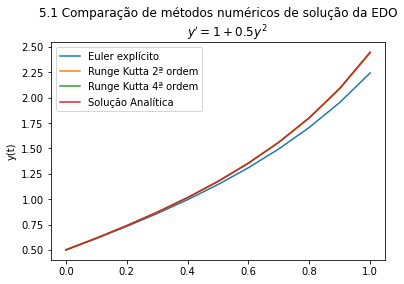

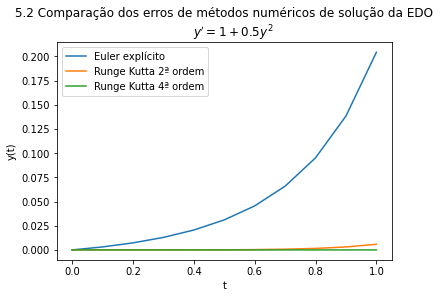

In [35]:
methods_used = ['Euler explícito',  'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = .5
dt = 0.1

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t, y : 1 +( 0.5 * (y ** 2))
'''Definindo função exata'''
y_bar = lambda t : (1 / math.sqrt(.5)) * math.tan((math.sqrt(.5) * t) + math.atan(.5 ** (3 / 2)))
'''criando objeto para os resultados'''
ex_5 = Resultado(t, y_o, y, y_bar, methods_used,dt)


'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n], y[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_5.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_5.apppend_error(erro)
erro = np.zeros(len(t))

# for n in range(len(t) - 1):
#     y[n + 1] = y[n] + (dt * y_prime(t[n + 1]))
        
# ex_5.set_implicity_euler(y)
# y = np.zeros(len(t))
# y[0] = y_o
# ex_5.apppend_error(erro)
# erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime(t[n + 1], (y[n] + k1))
    y[n + 1] = y[n] + 0.5 * (k1 + k2)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_5.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_5.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n], y[n])
    k2 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k1)))
    k3 = dt * y_prime((t[n] + (0.5 * dt)), (y[n] + (0.5 * k2)))
    k4 = dt * y_prime(t[n + 1], (y[n] + k3))
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_5.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_5.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_5.set_analitical(y_values)
ex_5.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('5.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = 1 + 0.5 y^2 $')
plt.ylabel('y(t)')
plt.plot(t, ex_5.explicit_euler)
# plt.plot(t, ex_5.implicity_euler)
plt.plot(t, ex_5.runge_kutta_2)
plt.plot(t, ex_5.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)
'''
Erro
'''
plt.figure()
plt.title('5.2 Comparação dos erros de métodos numéricos de solução da EDO\n \
    $ y^\prime = 1 + 0.5 y^2$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_5.errors[0])
plt.plot(t, ex_5.errors[1])
plt.plot(t, ex_5.errors[2])


plt.legend(methods_used)



## Exercício 6

Para a solucão deste exercício foi utilizado o desenvolvimento apresentado no exercício 1, adicionados os contadores de erro que a cada iteracão de cada método fazem a seguinte operacão:
$$
y_i \prime = |y_i - \bar{y_i}|
$$
onde $y_i\prime$ é o erro referente ao valor de $y_i$, que é o valor numérico calculado e $\bar{y_i}$ é o valor absoluto do resultado para um determinado valor de $t$.

Com isso podemos ver como funciona a propagacão de erro dos métodos numéricos para cada um dos métodos numéricos de solucão de EDO's. 

A partir dos resultados e gráficos vemos que:

```
Valor encontrado para os erros em t=1
0.029833334666666378
0.030166665333333675
0.00016666533333253852
3.33333360913457e-10
0.0
```

Como podemos observar, ambos os métodos eulerianos retornam valores em ordem de grandeza similar, inclusive seus gráficos são praticamente sobrepostos. O método de Runge Kutta de 2ªa ordem tem erros em uma ordem de grandeza muito menor do que ambos os métodos de euler (tem erros em `e-4` enquanto os métodos eulerianos tem erros da ordem de `e-2`). Além disso, note que o método de Runge Kutta de 2ª Ordem gera um gráfico em que próximo de 0.4 temos uma convergência quase absoluta com a solucão analítica, uma vez que o gráfico se aproxima muito de 0.0. Runge Kutta de 4ªa Ordem, por sua vez, tem uma convergência praticamente total com a solucão analítica, seus valores tem ordem de grandeza e-10 que para qualquer aplicacão prática é despresível.


Valor encontrado para os erros em t=1
0.029833334666666378
0.030166665333333675
0.00016666533333253852
3.33333360913457e-10
0.0


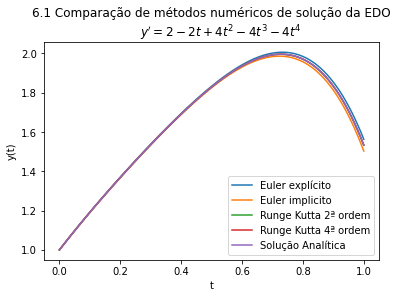

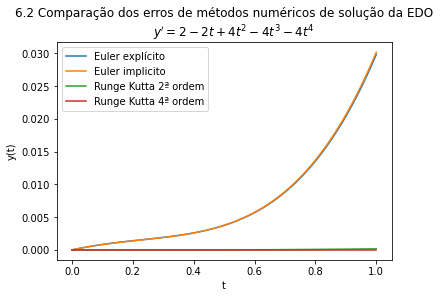

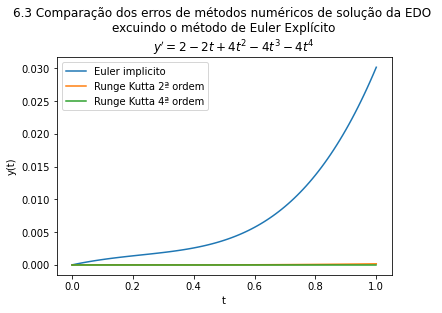

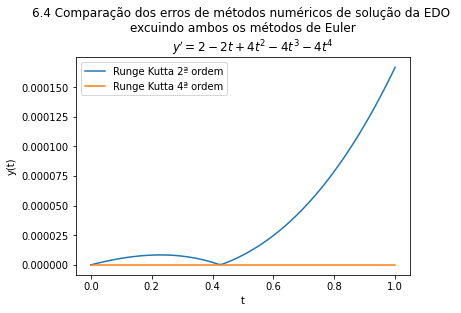

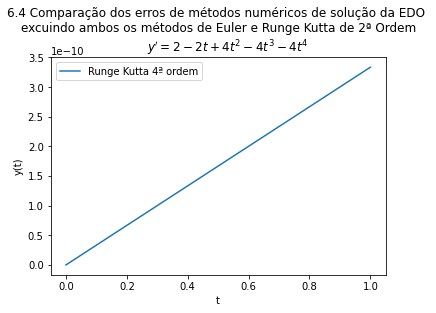

In [33]:
methods_used = ['Euler explícito', 'Euler implicito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt =0.01

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t: 2 - (2 * t) + (4 * (t ** 2)) - (4 * (t ** 3)) - (4 * (t ** 4))
'''Definindo função exata'''
y_bar = lambda t : 1 + (2 * t) - (t ** 2) + ((4 / 3) * (t ** 3)) - (t ** 4) - ((4 / 5) * (t ** 5))
'''criando objeto para os resultados'''
ex_6 = Resultado(t, y_o, y, y_bar, methods_used, dt)

'''Procedimento numérico'''

erros = []
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))

ex_6.set_explicit_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_6.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    y[n + 1] = y[n] + (dt * y_prime(t[n + 1]))
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))
    
ex_6.set_implicity_euler(y)
y = np.zeros(len(t))
y[0] = y_o
ex_6.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n])
    k2 = dt * y_prime(t[n + 1])
    y[n + 1] = y[n] + 0.5 * (k1 + k2)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))
    
ex_6.set_runge_kutta_2(y)
y = np.zeros(len(t))
y[0] = y_o
ex_6.apppend_error(erro)
erro = np.zeros(len(t))

for n in range(len(t) - 1):
    k1 = dt * y_prime(t[n])
    k2 = dt * y_prime(t[n] + (0.5 * dt))
    k3 = dt * y_prime(t[n] + (0.5 * dt))
    k4 = dt * y_prime(t[n + 1])
    y[n + 1] = y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    erro[n + 1] = np.abs(y[n+1] - y_bar(t[n + 1]))
    
ex_6.set_runge_kutta_4(y)
y = np.zeros(len(t))
y[0] = y_o
ex_6.apppend_error(erro)
erro = np.zeros(len(t))

y_values = []
for time in t:
    y_values.append(y_bar(time))

ex_6.set_analitical(y_values)
ex_6.apppend_error(erro)
erro = np.zeros(len(t))

'''
Resultado
'''
plt.title('6.1 Comparação de métodos numéricos de solução da EDO\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_6.explicit_euler)
plt.plot(t, ex_6.implicity_euler)
plt.plot(t, ex_6.runge_kutta_2)
plt.plot(t, ex_6.runge_kutta_4)
plt.plot(t, y_values)
plt.legend(methods_used)
'''
Erro
'''
plt.figure()
plt.title('6.2 Comparação dos erros de métodos numéricos de solução da EDO\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(t, ex_6.errors[0])
plt.plot(t, ex_6.errors[1])
plt.plot(t, ex_6.errors[2])
plt.plot(t, ex_6.errors[3])

plt.legend(methods_used)

plt.figure()
plt.title('6.3 Comparação dos erros de métodos numéricos de solução da EDO \nexcuindo o método de Euler Explícito\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
# plt.plot(t, ex_6.errors[0])
plt.plot(t, ex_6.errors[1])
plt.plot(t, ex_6.errors[2])
plt.plot(t, ex_6.errors[3])

plt.legend(methods_used[1:])

plt.figure()
plt.title('6.4 Comparação dos erros de métodos numéricos de solução da EDO \nexcuindo ambos os métodos de Euler\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
# plt.plot(t, ex_6.errors[0])
# plt.plot(t, ex_6.errors[1])
plt.plot(t, ex_6.errors[2])
plt.plot(t, ex_6.errors[3])

plt.legend(methods_used[2:])

plt.figure()
plt.title('6.4 Comparação dos erros de métodos numéricos de solução da EDO \nexcuindo ambos os métodos de Euler e Runge Kutta de 2ª Ordem\n \
    $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
plt.xlabel('t')
plt.ylabel('y(t)')
# plt.plot(t, ex_6.errors[0])
# plt.plot(t, ex_6.errors[1])
# plt.plot(t, ex_6.errors[2])
plt.plot(t, ex_6.errors[3])

plt.legend(methods_used[3:])

print('Valor encontrado para os erros em t=1')
for erro in ex_6.errors:
    print(erro[-1])

## 7

In [28]:
# L = [.1, 1., 10.]
# G = 9.81 

# theta_2_prime = lambda n, theta : - (G / L[n]) * math.sin(theta)
# theta_2_prime_simple = lambda n, theta : - (G / L[n]) * theta

# '''Definindo condições de contorno'''
# t_o = 0.
# t_final = 1.
# theta_o = [.0, 0.1, 0.5]
# theta_o_prime = 0.
# dt =0.1

# '''Definindo as arrays de tempo, y'''
# t = np.arange(t_o, t_final + dt, dt)
# theta_prime = np.zeros(len(t))
# theta_prime[0] = theta_o[0]
# theta = np.zeros(len(t))
# theta[0] = theta_o


# '''Procedimento numérico'''
# for n in range(len(t) - 1):
#     k1 = dt * theta_2_prime(0, t[n])
#     k2 = dt * theta_2_prime(0, t[n + 1])
#     theta_prime[n + 1] = theta_prime[n] + 0.5 * (k1 + k2)
#     print(f'Tempo = {t[n+1]:.2f}, y = {theta_prime[n+1]:.5f}')
#     print(f'Erro = {erro}')
    
# for n in range(len(t) - 1):
#     k1 = dt * theta_prime[n]
#     k2 = dt * theta_prime[n + 1]
#     theta[n + 1] = theta[n] + 0.5 * (k1 + k2)

# plt.figure()
# plt.plot(t, theta)



## 8

In [27]:
# from sympy import symbols, diff, lambdify

# C = 0.3
# R = 1.4
# L = 1.7
# t = symbols('t')
# t_values = np.arange(0, 10, .1)
# result = []
# y = np.zeros(len(t_values))
# y[0] = y_o

# epsilon = np.exp(-0.06 * np.pi * t) * math.sin(2 * t - np.pi)
# epsilon_prime = epsilon.diff(t)
# epsilon_2_prime = epsilon_prime.diff(t)

# print(epsilon)
# print(epsilon_prime)
# print(epsilon_2_prime)

# epsilon = lambdify(t, epsilon, 'numpy')
# epsilon_prime = lambdify(t, epsilon_prime, 'numpy')
# epsilon_2_prime = lambdify(t, epsilon_2_prime, 'numpy')

# i_prime = lambda t: C * epsilon_2_prime(t) + (1 / R) * epsilon_prime(t) + (1 / L) * epsilon(t)

# print('SETUP  DONE!')


# # for n in range(len(t_values) - 1):
# #     y[n + 1] = y[n] + (dt * y_prime(t_values[n]))
    
# # result.append(y)
# # y = np.zeros(len(t_values))
# # y[0] = y_o

# # '''
# # Resultado
# # '''
# # plt.title('6.1 Comparação de métodos numéricos de solução da EDO\n \
# #     $ y^\prime = 2 - 2t +4 t^2 - 4 t^3 - 4 t^4$')
# # plt.xlabel('t')
# # plt.ylabel('y(t)')
# # plt.plot(t, result[0])


